# Section 2.1.1
----------------------------------------

## Compare loss function
- Plot hinge loss and the huberized hinge loss function
- So as following the code below, we can see huberized hinge loss will be smoothed at [1-h, 1+h] range


<IPython.core.display.Javascript object>


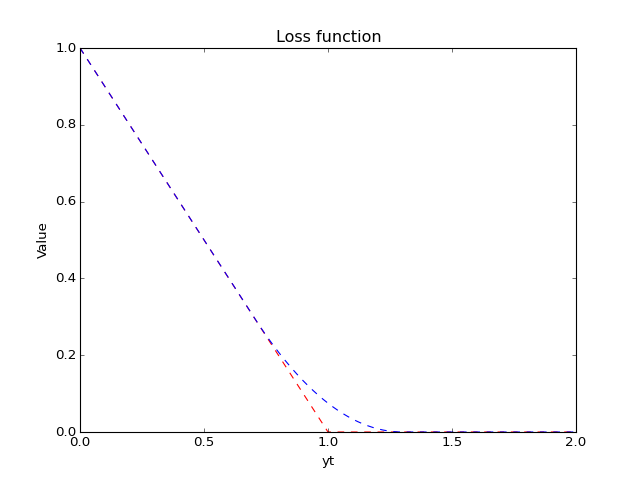

In [8]:
%matplotlib nbagg

import gradientDescent as gd
import numpy as np
import random, sys
import matplotlib.pyplot as plt

yt = np.arange(0., 2, 0.005)
out1 = map(gd.lossHinge, yt)
out2 = map(gd.lossHuberHinge, yt)
plt.plot(yt, out1, 'r--', yt, out2, 'b--')
plt.title('Loss function')
plt.ylabel('Value')
plt.xlabel('yt')
plt.show()


## Proof differentiable and Lipschitz-continuous
-- Please see the left part of the figure. To prove huberized hinge loss function is differentiable among all points yt I take the deliverative of loss function for yt. The slope of left point at very close to 1-h/1+h is the same as right point close to 1-h/1+h, and therefore this huberized hinge loss function is a differentiable function. 

-- Please see the right part of the figure. This function is 0-Lips and 1-Lips when yt > 1+h and yt < 1-h respectively. And although when yt at the range [1-h, 1+h] may not looks like Lips when first glance, but since yt is within a certain range, and it's still bounded in a certain range. 

-- Since Lipschitz is varied at different range, this function is not Lipschitz-continuous

<img src="./siamltexmm/Figure2.png" width=70%>

# Section 2.1.2
----------------------------------------

## Analytic expressions
-- Please see the proof below. Since huberized hinge loss function has three differen expression for yt at different interval, so I make the expression for each. Furthmore, the deliverative of W-transpost W is actuall a unit vector. 

<img src="./siamltexmm/Figure1.png" width=70%>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

In [ ]:
cross_val_score(LinearSVC(), X, y, cv=5)

In [ ]:
cross_val_score(LinearSVC(), X, y, cv=5, scoring="f1_macro")

Let's go to a binary task for a moment

In [ ]:
y % 2

In [ ]:
cross_val_score(LinearSVC(), X, y % 2)

In [ ]:
cross_val_score(LinearSVC(), X, y % 2, scoring="average_precision")

In [ ]:
cross_val_score(LinearSVC(), X, y % 2, scoring="roc_auc")

In [ ]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

Implementing your own scoring metric:

In [ ]:
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

cross_val_score(LinearSVC(), X, y, scoring=my_accuracy_scoring)

In [ ]:
def my_super_scoring(est, X, y):
    return np.mean(est.predict(X) == y) - np.mean(est.coef_ != 0)

In [ ]:
from sklearn.grid_search import GridSearchCV

y = iris.target
grid = GridSearchCV(LinearSVC(C=.01, dual=False),
                    param_grid={'penalty' : ['l1', 'l2']},
                    scoring=my_super_scoring)
grid.fit(X, y)
print(grid.best_params_)

There are other ways to do cross-valiation

In [ ]:
from sklearn.cross_validation import ShuffleSplit

shuffle_split = ShuffleSplit(len(X), 10, test_size=.4)
cross_val_score(LinearSVC(), X, y, cv=shuffle_split)

In [ ]:
from sklearn.cross_validation import StratifiedKFold, KFold, ShuffleSplit

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

In [ ]:
plot_cv(StratifiedKFold(y, n_folds=5), len(y))

In [ ]:
plot_cv(KFold(len(iris.target), n_folds=5), len(iris.target))

In [ ]:
plot_cv(ShuffleSplit(len(iris.target), n_iter=20, test_size=.2), 
        len(iris.target))

# Exercises
Use  KFold cross validation and StratifiedKFold cross validation (3 or 5 folds) for LinearSVC on the iris dataset.
Why are the results so different? How could you get more similar results?

In [ ]:
# %load solutions/cross_validation_iris.py